In [32]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'




(391, 211)


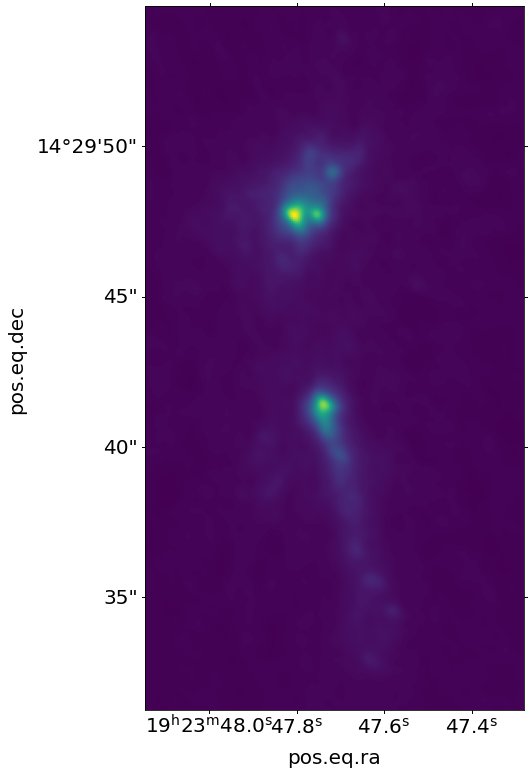

In [48]:

fitsdata_b6 = fits.open(w51e_b6_almaimf_conv)
wcs_b6 = WCS(fitsdata_b6[0].header,naxis=2)
xypos_image_b6 = [930, 1140, 780, 1170]
xypos_image_b6 = np.array([[780, 930],[1170,930],[780,1140],[1170,1140]])
xypos_sky_b3 = wcs_b6.wcs_pix2world(xypos_image_b6,0)


fitsdata_b3 = fits.open(w51e_b3_almaimf_conv)
wcs_b3 = WCS(fitsdata_b3[0].header,naxis=2)
xypos_image_b3 = wcs_b3.wcs_world2pix(xypos_sky_b3,0)



imageb3 = fitsdata_b3[0].data
imageb6 = fitsdata_b6[0].data

imageb6_cut = imageb6[780:1171,930:1141]
imageb3_cut = imageb3[int(xypos_image_b3[0][0]):int(xypos_image_b3[1][0]),int(xypos_image_b3[0][1]):int(xypos_image_b3[2][1])]
y_b3 = np.arange(imageb3_cut.shape[1])
x_b3 = np.arange(imageb3_cut.shape[0])
print(imageb6_cut.shape)

xnew = np.linspace(0,imageb3_cut.shape[1],num=imageb6_cut.shape[1])
ynew = np.linspace(0,imageb3_cut.shape[0],num=imageb6_cut.shape[0])

imageb3_cut_interpol_func = interpolate.interp2d(y_b3,x_b3,imageb3_cut)
imageb3_cut_interpol = imageb3_cut_interpol_func(xnew,ynew)
#interpolate.interp2d(y_b6, x_b6, image_b6_cut,  )


fig = plt.figure(figsize=(imageb6_cut.shape[1]/40, imageb6_cut.shape[0]/40))
ax1 = fig.add_axes([0,0,1,1,],projection=wcs_b6)
ax1.imshow(imageb6[780:1170,930:1140],origin='lower')







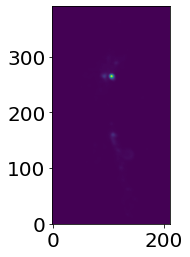

In [34]:
plt.imshow(imageb3_cut_interpol,origin='lower')

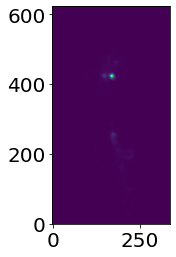

In [35]:
plt.imshow(imageb3[int(xypos_image_b3[0][0]):int(xypos_image_b3[1][0]),int(xypos_image_b3[0][1]):int(xypos_image_b3[2][1])],origin='lower')




In [36]:
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
def cen_freq(start,end,alpha=2):
    freqarr = np.logspace(np.log10(start),np.log10(end),20)
    dfreq = freqarr[1:]-freqarr[:-1]
    dfreq = np.append(dfreq,[dfreq[-1]])
    
    integral_up = np.sum(freqarr**(alpha+1)*dfreq)
    integral_down = np.sum(freqarr**(alpha)*dfreq)
    print(dfreq,integral_up,integral_down)
    return integral_up/integral_down

b3_cent_freq = fitsdata_b3[0].header['CRVAL4']
b3_del_freq =  fitsdata_b3[0].header['CDELT4']
freqb3 = cen_freq(b3_cent_freq-b3_del_freq/2,b3_cent_freq+b3_del_freq/2)
b6_cent_freq = fitsdata_b6[0].header['CRVAL4']
b6_del_freq =  fitsdata_b6[0].header['CDELT4']
freqb6 = cen_freq(b6_cent_freq-b6_del_freq/2,b6_cent_freq+b6_del_freq/2)



[6.73964386e+08 6.78915760e+08 6.83903509e+08 6.88927902e+08
 6.93989207e+08 6.99087696e+08 7.04223641e+08 7.09397318e+08
 7.14609005e+08 7.19858979e+08 7.25147524e+08 7.30474921e+08
 7.35841457e+08 7.41247419e+08 7.46693097e+08 7.52178782e+08
 7.57704769e+08 7.63271352e+08 7.68878832e+08 7.68878832e+08] 1.3934041267384096e+43 1.4081395050432186e+32
[8.62798964e+08 8.66244674e+08 8.69704145e+08 8.73177432e+08
 8.76664589e+08 8.80165673e+08 8.83680740e+08 8.87209844e+08
 8.90753042e+08 8.94310390e+08 8.97881945e+08 9.01467764e+08
 9.05067903e+08 9.08682420e+08 9.12311372e+08 9.15954817e+08
 9.19612812e+08 9.23285416e+08 9.26972687e+08 9.26972687e+08] 2.032690589446448e+44 9.042496096154019e+32


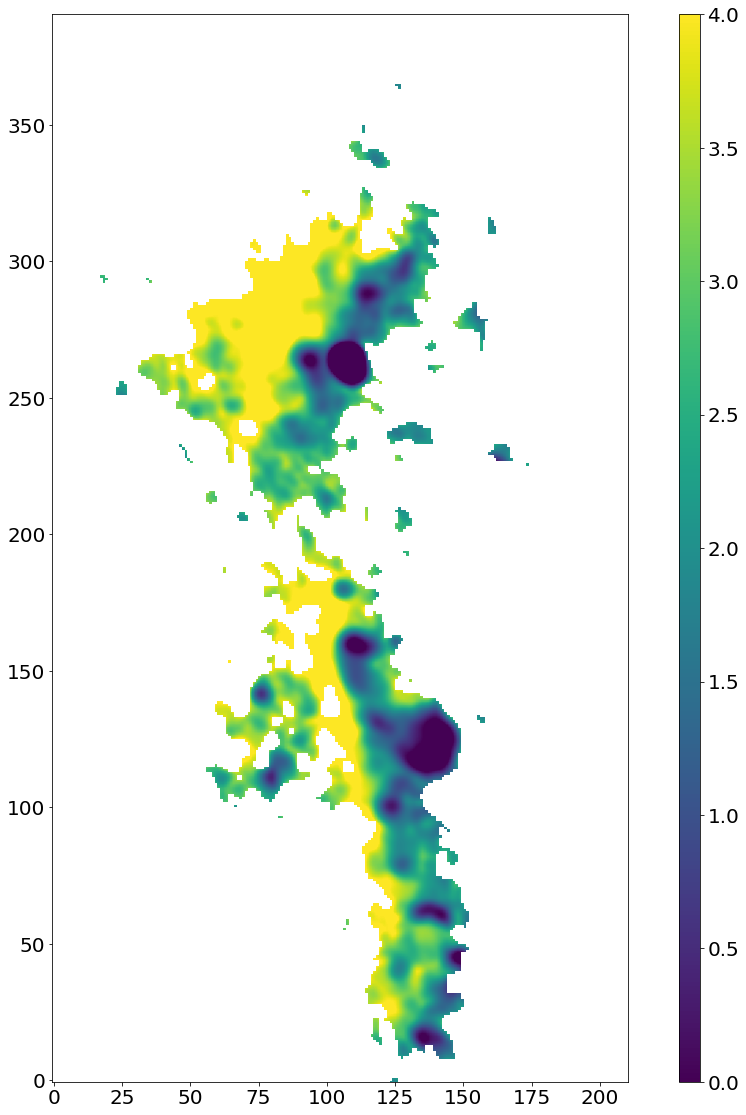

In [37]:
from astropy.table import Table

t = Table.read('dendro_table_w51e.fits')
xpeak = t['peak_ra_B3']
ypeak = t['peak_dec_B3']
xypeak_sources_sky = np.vstack((xpeak,ypeak)).T
xypeak_sources = wcs_b3.wcs_world2pix(xypeak_sources_sky,0)



alpha = (np.log10(imageb3_cut_interpol)-np.log10(imageb6_cut))/(np.log10(freqb3)-np.log10(freqb6))
mask = (imageb3_cut_interpol>5e-4) & (imageb6_cut>2.5e-3)
alpha[~mask]=np.nan
fig = plt.figure(figsize=(10,10*8/9*alpha.shape[0]/alpha.shape[1]))
ax1 = fig.add_axes([0.05,0.05,0.8,0.9])
cax = fig.add_axes([0.92,0.05,0.03,0.9])

pp = ax1.imshow(alpha,origin='lower',vmin=0,vmax=4)

#ax1.scatter(xypeak_sources[:,0]-930,xypeak_sources[:,1]-780, c='magenta',marker='x')
plt.colorbar(pp,cax=cax)

    
    

[[1820.         1647.62165203]
 [2180.         1647.62165205]
 [1820.         2087.62165202]
 [2180.         2087.62165203]]
[430, 650, 510, 690]
(180, 220)
(360, 440)
(180, 220)


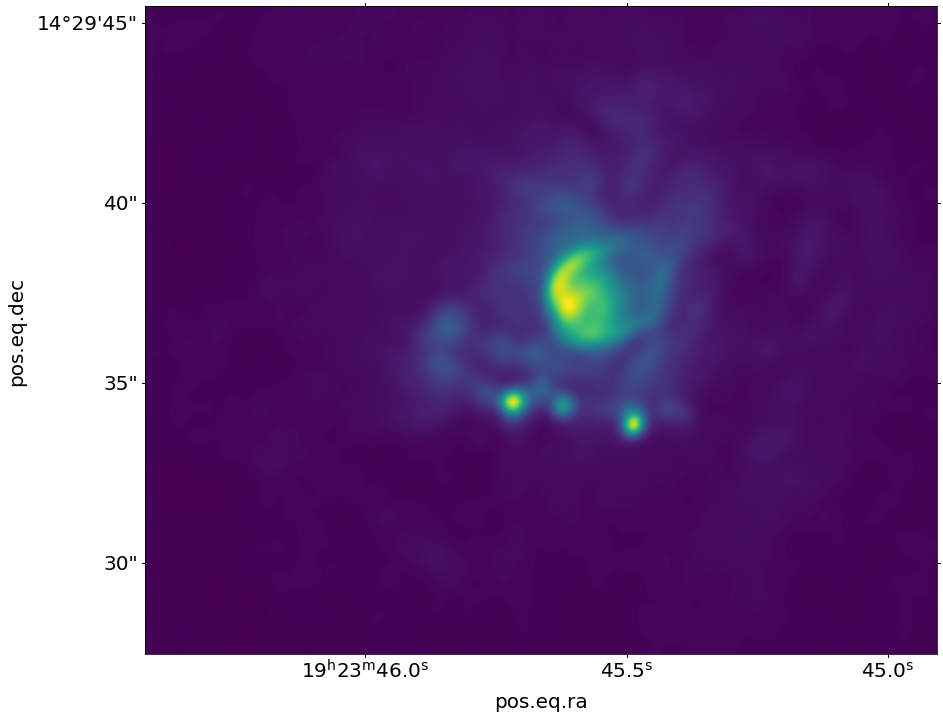

In [54]:
fitsdata_b3 = fits.open(w51n_b3_almaimf_conv)
wcs_b3 = WCS(fitsdata_b3[0].header,naxis=2)

fitsdata_b6 = fits.open(w51n_b6_almaimf)
wcs_b6 = WCS(fitsdata_b6[0].header,naxis=2)

xypos_image_b6 = [ 430,650, 510, 690]
xypos_image_b6_coord = np.array([[510, 430],[690,430],[510,650],[690,650]])
xypos_sky_b6 = wcs_b6.wcs_pix2world(xypos_image_b6_coord,0)


xypos_image_b3 = wcs_b3.wcs_world2pix(xypos_sky_b6,0)

print(xypos_image_b3)
print(xypos_image_b6)

imageb3 = fitsdata_b3[0].data
imageb6 = fitsdata_b6[0].data[0][0]

imageb3_cut = imageb3[int(xypos_image_b3[0][0]):int(xypos_image_b3[1][0]),int(xypos_image_b3[0][1]):int(xypos_image_b3[2][1])]
imageb6_cut = imageb6[int(xypos_image_b6[2]):int(xypos_image_b6[3]),int(xypos_image_b6[0]):int(xypos_image_b6[1])]
y_b3 = np.arange(imageb3_cut.shape[1])
x_b3 = np.arange(imageb3_cut.shape[0])
print(imageb6_cut.shape)
print(imageb3_cut.shape)


xnew = np.linspace(0,imageb3_cut.shape[1],num=imageb6_cut.shape[1])
ynew = np.linspace(0,imageb3_cut.shape[0],num=imageb6_cut.shape[0])

imageb3_cut_interpol_func = interpolate.interp2d(y_b3,x_b3,imageb3_cut)
imageb3_cut_interpol = imageb3_cut_interpol_func(xnew,ynew)
print(imageb3_cut_interpol.shape)
#interpolate.interp2d(y_b6, x_b6, image_b6_cut,  )

fig = plt.figure(figsize=(imageb3_cut.shape[1]/40, imageb3_cut.shape[0]/40))
ax1 = fig.add_axes([0,0,1,1,],projection=wcs_b3)
plt.imshow(imageb3_cut,origin='lower')







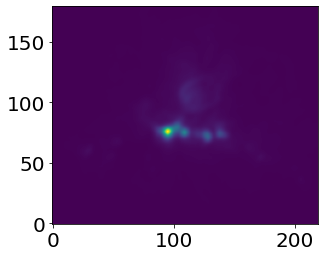

In [55]:
plt.imshow(imageb6_cut,origin='lower')

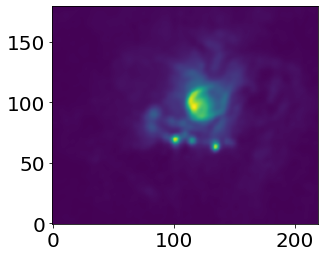

In [56]:
plt.imshow(imageb3_cut_interpol,origin='lower')

In [57]:
b3_cent_freq = fitsdata_b3[0].header['CRVAL4']
b3_del_freq =  fitsdata_b3[0].header['CDELT4']
freqb3 = cen_freq(b3_cent_freq-b3_del_freq/2,b3_cent_freq+b3_del_freq/2)
b6_cent_freq = fitsdata_b6[0].header['CRVAL4']
b6_del_freq =  fitsdata_b6[0].header['CDELT4']
freqb6 = cen_freq(b6_cent_freq-b6_del_freq/2,b6_cent_freq+b6_del_freq/2)


[6.73964331e+08 6.78915703e+08 6.83903452e+08 6.88927844e+08
 6.93989148e+08 6.99087636e+08 7.04223580e+08 7.09397257e+08
 7.14608942e+08 7.19858916e+08 7.25147460e+08 7.30474857e+08
 7.35841392e+08 7.41247353e+08 7.46693030e+08 7.52178714e+08
 7.57704699e+08 7.63271282e+08 7.68878761e+08 7.68878761e+08] 1.3934039354369785e+43 1.4081393352282254e+32
[8.62819458e+08 8.66265332e+08 8.69724968e+08 8.73198421e+08
 8.76685746e+08 8.80186998e+08 8.83702233e+08 8.87231508e+08
 8.90774877e+08 8.94332398e+08 8.97904126e+08 9.01490119e+08
 9.05090433e+08 9.08705127e+08 9.12334256e+08 9.15977879e+08
 9.19636054e+08 9.23308838e+08 9.26996291e+08 9.26996291e+08] 2.0327457601347784e+44 9.042733827438146e+32


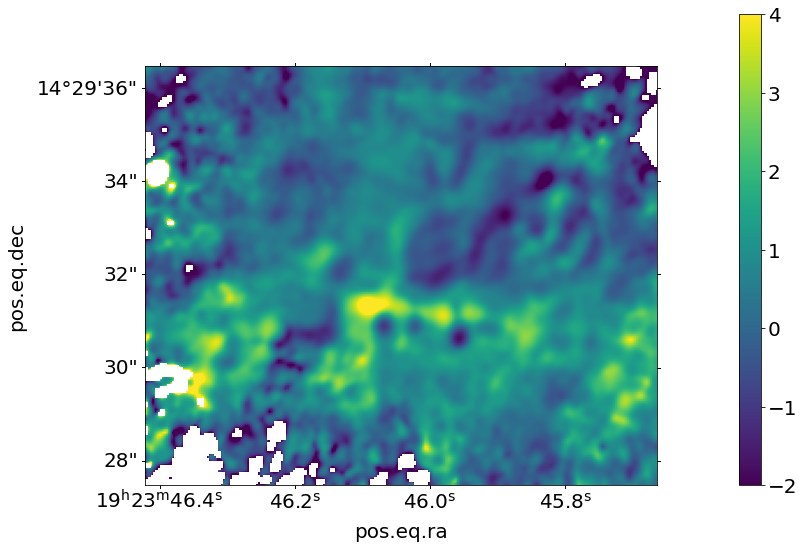

In [58]:
from astropy.table import Table

t = Table.read('dendro_table_w51e.fits')
xpeak = t['peak_ra_B3']
ypeak = t['peak_dec_B3']
xypeak_sources_sky = np.vstack((xpeak,ypeak)).T
xypeak_sources = wcs_b3.wcs_world2pix(xypeak_sources_sky,0)



alpha = (np.log10(imageb3_cut_interpol)-np.log10(imageb6_cut))/(np.log10(freqb3)-np.log10(freqb6))
mask = (imageb3_cut_interpol>3*8e-4) & (imageb6_cut>3*2e-4)
#alpha[~mask]=np.nan
fig = plt.figure(figsize=(10,10*8/9*alpha.shape[0]/alpha.shape[1]))
ax1 = fig.add_axes([0.05,0.05,0.8,0.8],projection=wcs_b3)
cax = fig.add_axes([0.92,0.05,0.03,0.9])

pp = ax1.imshow(alpha,origin='lower',vmin=-2,vmax=4)

#ax1.scatter(xypeak_sources[:,0]-930,xypeak_sources[:,1]-780, c='magenta',marker='x')
plt.colorbar(pp,cax=cax)

In [76]:

w51_alma_imf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/'
w51e_b3_alma_imf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_alma_imf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51n_b3_alma_imf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_alma_imf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

def convolve_adam(ax, b3file, b6file,outdir,label):
    
    image_b3 = SpectralCube.read(b3file, use_dask=False, format='fits').minimal_subcube()
    image_b6 = SpectralCube.read(b6file, use_dask=False, format='fits').minimal_subcube()
    image_b3 = image_b3 * u.beam / image_b3.beam.sr
    image_b6 = image_b6 * u.beam / image_b6.beam.sr
    
    hdrNB6 = fits.getheader(b6file) 
    hdrNB3 = fits.getheader(b3file)  
    wcs_b3 = WCS(hdrNB3,naxis=2)
    wcs_b6 = WCS(hdrNB6,naxis=2)
    
    xypos_image_b3 = wcs_b3.wcs_world2pix(xypos_sky_b3,0)
    xypos_image_b6 = wcs_b6.wcs_world2pix(xypos_sky_b3,0)
    


    print(xypos_image_b3)
    print(xypos_image_b6)
    
    
    
   
    beams = radio_beam.Beams(major=u.Quantity([image_b3.beam.major, image_b6.beam.major]),
                                 minor=u.Quantity([image_b3.beam.minor, image_b6.beam.minor]),
                                 pa=u.Quantity([image_b3.beam.pa, image_b6.beam.pa]))
    commonbeam = radio_beam.commonbeam.commonbeam(beams)
    
    if image_b3.beam.sr < image_b6.beam.sr:
        header = image_b6[0].header
    else:
        header = image_b3[0].header
    image_b3_repr = image_b3[0].convolve_to(commonbeam, allow_huge=True).reproject(header)
    #fits.writeto(outdir+'/%s_B3_conv_adam.fits'%label, image_b3_repr.value, header, overwrite = True)

    image_b6_repr = image_b6[0].convolve_to(commonbeam, allow_huge=True).reproject(header)
    
    print(image_b3_repr.shape)
    print(image_b6_repr.shape)
    #image_b3_cut = image_b3_repr[int(xypos_image_b3[0][0]):int(xypos_image_b3[1][0]),int(xypos_image_b3[0][1]):int(xypos_image_b3[2][1])]
    #image_b6_cut = image_b6_repr[int(xypos_image_b6[0][0]):int(xypos_image_b6[1][0]),int(xypos_image_b6[0][1]):int(xypos_image_b6[2][1])]

    
    alpha_b3_b6 = (np.log(image_b3_repr / image_b6_repr) / np.log(image_b3.wcs.wcs.crval[2] / image_b6.wcs.wcs.crval[2])).value

    #fits.writeto(outdir+'/%s_B6_conv_adam.fits'%label, image_b6_repr.value, header, overwrite = True)
    ax.imshow(alpha_b3_b6,origin='lower',vmin=-2,vmax=4)

    
    



[[ 434.80160784 1191.68942234]
 [ 902.80158483 1191.65213978]
 [ 434.82167192 1443.68941891]
 [ 902.82164892 1443.65213636]]
[[-182.59919608  202.03388467]
 [  51.40079242  202.01524361]
 [-182.58916404  328.03388302]
 [  51.41082446  328.01524195]]
(976, 925)
(976, 925)


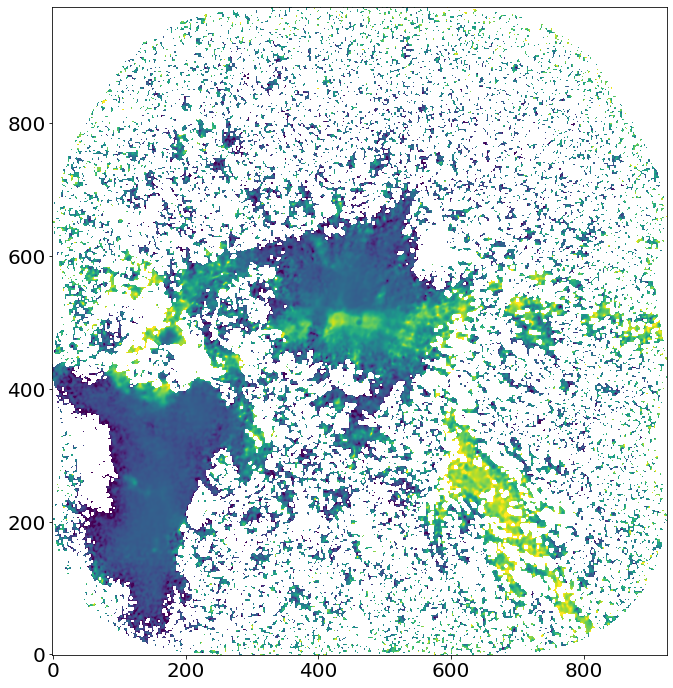

In [78]:
fitsdata_b3 = fits.open(w51n_b6_alma_imf)
wcs_b3 = WCS(fitsdata_b3[0].header,naxis=2)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_axes([0.05,0.05,0.8,0.9])

#convolve_adam(w51e_b3_alma_imf, w51e_b6_alma_imf, w51_alma_imf, 'w51e')
convolve_adam(ax1,w51n_b3_alma_imf, w51n_b6_alma_imf, w51_alma_imf, 'w51n')